<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif-:" data-toc-modified-id="Objectif-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif :</a></span></li><li><span><a href="#Dev" data-toc-modified-id="Dev-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dev</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Industrialisation</a></span><ul class="toc-item"><li><span><a href="#Script" data-toc-modified-id="Script-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Script</a></span></li></ul></li><li><span><a href="#Analyse-de-la-feature" data-toc-modified-id="Analyse-de-la-feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse de la feature</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-dépot-suivant-les-stations" data-toc-modified-id="Analyse-des-dépot-suivant-les-stations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analyse des dépot suivant les stations</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from vcub_keeper.reader.reader import *
from vcub_keeper.visualisation import plot_station_activity

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Objectif :

- Création d'une features afin de connaitre le nombre de transaction (ajout et dépôt) de vélo qu'il y a eu pour une même station entre 2 points temporels. cf https://github.com/armgilles/vcub_keeper/issues/2
- Industrialisation de la fonction
- Analyse des résultats

## Dev

In [55]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

In [56]:
activite.head()

gid  station_id type       name state  available_stand  available_bike  \
0   83           1  VLS  Meriadeck     1               18               2   
1   83           1  VLS  Meriadeck     1               18               2   
2   83           1  VLS  Meriadeck     1               18               2   
3   83           1  VLS  Meriadeck     1               18               2   
4   83           1  VLS  Meriadeck     1               18               2   

                 date  
0 2017-07-09 00:03:04  
1 2017-07-09 00:04:04  
2 2017-07-09 00:09:04  
3 2017-07-09 00:14:03  
4 2017-07-09 00:19:04

In [57]:
activite['available_bike_shift'] = \
    activite.groupby('station_id')['available_bike'].shift(1)

activite['available_stand_shift'] = activite['available_bike_shift'].fillna(activite['available_bike'])

activite['transactions_all'] = np.abs(activite['available_bike'] - activite['available_bike_shift'])

In [59]:
activite[99650:99665]

gid  station_id type            name state  available_stand  \
99650   43           5  VLS  Place Gambetta     0               36   
99651   43           5  VLS  Place Gambetta     0               36   
99652   43           5  VLS  Place Gambetta     0               36   
99653   43           5  VLS  Place Gambetta     0               36   
99654   43           5  VLS  Place Gambetta     0               36   
99655   43           5  VLS  Place Gambetta     0               36   
99656   43           5  VLS  Place Gambetta     0               36   
99657   43           5  VLS  Place Gambetta     0               36   
99658   43           5  VLS  Place Gambetta     0               36   
99659   43           5  VLS  Place Gambetta     0               36   
99660   43           5  VLS  Place Gambetta     1               12   
99661   43           5  VLS  Place Gambetta     1                3   
99662   43           5  VLS  Place Gambetta     1                3   
99663   43           5  VLS  Place Gambetta     1                0   
99664   43           5  VLS  Place Gambetta     1                0   

       available_bike                date  available_bike_shift  \
99650               3 2017-08-28 04:44:04                   3.0   
99651               3 2017-08-28 04:49:03                   3.0   
99652               3 2017-08-28 04:54:04                   3.0   
99653               3 2017-08-28 04:59:03                   3.0   
99654               3 2017-08-28 05:04:05                   3.0   
99655               3 2017-08-28 05:09:03                   3.0   
99656               3 2017-08-28 05:14:04                   3.0   
99657               3 2017-08-28 05:19:04                   3.0   
99658               3 2017-08-28 05:24:04                   3.0   
99659               3 2017-08-28 05:29:04                   3.0   
99660               3 2017-08-28 05:34:04                   3.0   
99661              37 2017-08-28 05:39:04                   3.0   
99662              37 2017-08-28 05:44:05                  37.0   
99663              39 2017-08-28 05:49:04                  37.0   
99664              39 2017-08-28 05:54:03                  39.0   

       available_stand_shift  transactions_all  
99650                    3.0               0.0  
99651                    3.0               0.0  
99652                    3.0               0.0  
99653                    3.0               0.0  
99654                    3.0               0.0  
99655                    3.0               0.0  
99656                    3.0               0.0  
99657                    3.0               0.0  
99658                    3.0               0.0  
99659                    3.0               0.0  
99660                    3.0               0.0  
99661                    3.0              34.0  
99662                   37.0               0.0  
99663                   37.0               2.0  
99664                   39.0               0.0

## Industrialisation

In [23]:
import pandas as pd 

def get_transactions_all(data):
    """
    Calcul le nombre de transactions de vélo (ajout et dépôt) qu'il y a eu pour une même station entre 2 points de données
    
    Parameters
    ----------
    data : DataFrame
        Activité des stations Vcub
    
    Returns
    -------
    data : DataFrame
        Ajout de colonne 'transactions_all'
        
    Examples
    --------
    
    activite = get_transactions_aall(activite)
    """
    
    data['available_bike_shift'] = \
    data.groupby('station_id')['available_bike'].shift(1)

    data['available_bike_shift'] = data['available_bike_shift'].fillna(data['available_bike'])

    data['transactions_all'] = np.abs(data['available_bike'] - data['available_bike_shift'])
    
    # Drop non usefull column
    data.drop('available_bike_shift', axis=1, inplace=True)
    
    return data

In [14]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_all(activite)

In [15]:
activite.tail()

gid  station_id type    name state  available_stand  available_bike  \
3761875  176         174  VLS  Darwin     1                1              19   
3761876  176         174  VLS  Darwin     1                0              20   
3761877  176         174  VLS  Darwin     1                0              20   
3761878  176         174  VLS  Darwin     1                0              20   
3761879  176         174  VLS  Darwin     1                0              20   

                       date  transactions_ajout  
3761875 2017-09-26 14:39:02                 0.0  
3761876 2017-09-26 14:44:05                 1.0  
3761877 2017-09-26 14:49:05                 0.0  
3761878 2017-09-26 14:54:04                 0.0  
3761879 2017-09-26 14:59:04                 0.0

### Script

In [24]:
from vcub_keeper.reader.reader import *
from vcub_keeper.transform.features_factory import *

In [28]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_all(activite)

In [29]:
activite[136025:136050]

gid  station_id type               name state  available_stand  \
136025   86           7  VLS  Palais de Justice     1               16   
136026   86           7  VLS  Palais de Justice     1               16   
136027   86           7  VLS  Palais de Justice     1               16   
136028   86           7  VLS  Palais de Justice     1               16   
136029   86           7  VLS  Palais de Justice     1               17   
136030   86           7  VLS  Palais de Justice     1               16   
136031   86           7  VLS  Palais de Justice     1               16   
136032   86           7  VLS  Palais de Justice     1               16   
136033   86           7  VLS  Palais de Justice     1               16   
136034   86           7  VLS  Palais de Justice     1               16   
136035   86           7  VLS  Palais de Justice     1               15   
136036   86           7  VLS  Palais de Justice     1               16   
136037   86           7  VLS  Palais de Justice     1               17   
136038   86           7  VLS  Palais de Justice     1               18   
136039   86           7  VLS  Palais de Justice     1               17   
136040   86           7  VLS  Palais de Justice     1               17   
136041   86           7  VLS  Palais de Justice     1               12   
136042   86           7  VLS  Palais de Justice     1               14   
136043   86           7  VLS  Palais de Justice     1               16   
136044   86           7  VLS  Palais de Justice     1               16   
136045   86           7  VLS  Palais de Justice     1               16   
136046   86           7  VLS  Palais de Justice     1               16   
136047   86           7  VLS  Palais de Justice     1               15   
136048   86           7  VLS  Palais de Justice     1               16   
136049   86           7  VLS  Palais de Justice     1               16   

        available_bike                date  transactions_all  
136025               2 2017-08-02 10:55:03               1.0  
136026               2 2017-08-02 11:00:03               0.0  
136027               2 2017-08-02 11:05:04               0.0  
136028               2 2017-08-02 11:10:04               0.0  
136029               1 2017-08-02 11:15:03               1.0  
136030               2 2017-08-02 11:25:04               1.0  
136031               2 2017-08-02 11:30:06               0.0  
136032               2 2017-08-02 11:35:04               0.0  
136033               2 2017-08-02 11:40:05               0.0  
136034               2 2017-08-02 11:45:03               0.0  
136035               3 2017-08-02 11:55:03               1.0  
136036               2 2017-08-02 12:05:04               1.0  
136037               1 2017-08-02 12:10:04               1.0  
136038               0 2017-08-02 12:15:03               1.0  
136039               1 2017-08-02 12:20:04               1.0  
136040               1 2017-08-02 12:25:04               0.0  
136041               6 2017-08-02 12:40:06               5.0  
136042               4 2017-08-02 12:45:03               2.0  
136043               2 2017-08-02 12:55:03               2.0  
136044               2 2017-08-02 13:00:04               0.0  
136045               2 2017-08-02 13:05:04               0.0  
136046               2 2017-08-02 13:10:04               0.0  
136047               3 2017-08-02 13:15:04               1.0  
136048               2 2017-08-02 13:30:04               1.0  
136049               2 2017-08-02 13:35:04               0.0

## Analyse de la feature

In [34]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_all(activite)

# Autres transactions
activite = get_transactions_ajout(activite)
activite = get_transactions_depot(activite)

In [35]:
activite['transactions_all'].describe()

count    3.761880e+06
mean     2.560156e-01
std      6.852153e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+01
Name: transactions_all, dtype: float64

<AxesSubplot:xlabel='transactions_all'>

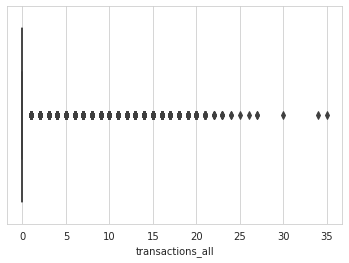

In [36]:
sns.boxplot(activite['transactions_all'])

/home/gillesa/anaconda3/envs/vcub_keeper/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



<AxesSubplot:xlabel='transactions_all'>

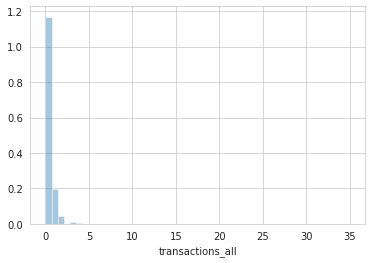

In [37]:
sns.distplot(activite['transactions_all'])

### Analyse des dépot suivant les stations

In [38]:
ajout_by_station = \
    activite.groupby('station_id',
                     as_index=False)['transactions_all'].agg({'max': 'max',
                                                              'mean': 'mean',
                                                              'median': 'median',
                                                              'min': 'min',
                                                              'std': 'std',
                                                              'var': 'var',
                                                              'skew': 'skew',
                                                              '25%': lambda x: x.quantile(0.25),
                                                              '75%': lambda x: x.quantile(0.75),
                                                              '95%':  lambda x: x.quantile(0.95)
                                                             })

ajout_by_station.sort_values('mean', ascending=0, inplace=True)

In [39]:
ajout_by_station

station_id   max      mean  median  min       std       var        skew  \
105         106  21.0  1.129741     1.0  0.0  1.578292  2.491007    3.315936   
4             5  34.0  0.894912     1.0  0.0  1.326123  1.758603    4.066788   
21           22  20.0  0.866327     0.0  0.0  1.218026  1.483588    2.689753   
122         123  23.0  0.833580     0.0  0.0  1.418022  2.010788    4.359152   
38           39  25.0  0.831175     0.0  0.0  1.296146  1.679994    3.545447   
..          ...   ...       ...     ...  ...       ...       ...         ...   
159         160   3.0  0.002359     0.0  0.0  0.062659  0.003926   32.041985   
75           76   1.0  0.000093     0.0  0.0  0.009618  0.000093  103.963935   
92           93   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   
136         137   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   
34           35   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   

     25%  75%  95%  
105  0.0  2.0  4.0  
4    0.0  1.0  3.0  
21   0.0  1.0  3.0  
122  0.0  1.0  3.0  
38   0.0  1.0  3.0  
..   ...  ...  ...  
159  0.0  0.0  0.0  
75   0.0  0.0  0.0  
92   0.0  0.0  0.0  
136  0.0  0.0  0.0  
34   0.0  0.0  0.0  

[174 rows x 11 columns]

In [41]:
# Station les plus active sur les dépôt de vélo
plot_station_activity(activite, station_ids=[106, 5], feature_to_plot='transactions_all')

In [42]:
# Station les plus active sur les dépôt de vélo
plot_station_activity(activite, station_ids=[160, 76], feature_to_plot='transactions_ajout')

In [43]:
activite.head()

gid  station_id type       name state  available_stand  available_bike  \
0   83           1  VLS  Meriadeck     1               18               2   
1   83           1  VLS  Meriadeck     1               18               2   
2   83           1  VLS  Meriadeck     1               18               2   
3   83           1  VLS  Meriadeck     1               18               2   
4   83           1  VLS  Meriadeck     1               18               2   

                 date  transactions_all  transactions_ajout  \
0 2017-07-09 00:03:04               0.0                 0.0   
1 2017-07-09 00:04:04               0.0                 0.0   
2 2017-07-09 00:09:04               0.0                 0.0   
3 2017-07-09 00:14:03               0.0                 0.0   
4 2017-07-09 00:19:04               0.0                 0.0   

   transactions_depot  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [54]:
activite[(activite.station_id == 5) & (activite.date >= "2017-08-28 05:20:00")]

gid  station_id type            name state  available_stand  \
99658    43           5  VLS  Place Gambetta     0               36   
99659    43           5  VLS  Place Gambetta     0               36   
99660    43           5  VLS  Place Gambetta     1               12   
99661    43           5  VLS  Place Gambetta     1                3   
99662    43           5  VLS  Place Gambetta     1                3   
...     ...         ...  ...             ...   ...              ...   
108095   43           5  VLS  Place Gambetta     1               14   
108096   43           5  VLS  Place Gambetta     1               14   
108097   43           5  VLS  Place Gambetta     1               15   
108098   43           5  VLS  Place Gambetta     1               16   
108099   43           5  VLS  Place Gambetta     1               15   

        available_bike                date  transactions_all  \
99658                3 2017-08-28 05:24:04               0.0   
99659                3 2017-08-28 05:29:04               0.0   
99660                3 2017-08-28 05:34:04               0.0   
99661               37 2017-08-28 05:39:04              34.0   
99662               37 2017-08-28 05:44:05               0.0   
...                ...                 ...               ...   
108095              25 2017-09-26 14:39:02               1.0   
108096              25 2017-09-26 14:44:05               0.0   
108097              24 2017-09-26 14:49:05               1.0   
108098              23 2017-09-26 14:54:04               1.0   
108099              24 2017-09-26 14:59:04               1.0   

        transactions_ajout  transactions_depot  
99658                  0.0                 0.0  
99659                  0.0                 0.0  
99660                  0.0                 0.0  
99661                 34.0                 0.0  
99662                  0.0                 0.0  
...                    ...                 ...  
108095                 1.0                 0.0  
108096                 0.0                 0.0  
108097                 0.0                 1.0  
108098                 0.0                 1.0  
108099                 1.0                 0.0  

[8442 rows x 11 columns]

In [47]:
plot_station_activity(activite, station_ids=[5], feature_to_plot='transactions_ajout',
                      start_date='2017-08-22', end_date='2017-08-30')

In [37]:
plot_station_activity(activite, station_ids=[5], feature_to_plot='available_bike',
                      start_date='2017-08-22', end_date='2017-08-30')